# Exercise
1. download a netCDF file from [EMODnet-Physics](https://www.emodnet-physics.eu/Map/).
2. read the time and the temperature from one of the downloaded files (hint: create a function).
3. loop on all the files to read all the data.
4. plot the time series.

In [10]:
# Add here all the "import" commands for the modules you need
import os
import glob
import matplotlib.pyplot as plt
import netCDF4
import numpy as np

## 1. Data file

In [11]:
datadir = "../data/Tarifa-coast-buoy/"
datafile1 = os.path.join(datadir, "IR_TS_MO_Tarifa-coast-buoy_20190830.nc")
os.path.exists(datafile1)

True

## 2. Data reading
Hint: use the [`netCDF4`](https://unidata.github.io/netcdf4-python/netCDF4/index.html) library.

In [28]:
def read_temp_nc(datafile):
    """
    Read the time and the temperature from a netCDF file
    """
    with netCDF4.Dataset(datafile) as nc:
        time = nc.variables["TIME"][:]
        depth = nc.variables["DEPH"][:]
        temperature = nc.variables["TEMP"][:,1]
        
    return time, temperature

In [29]:
time, temperature = read_temp_nc(datafile1)

### Simple plot to check

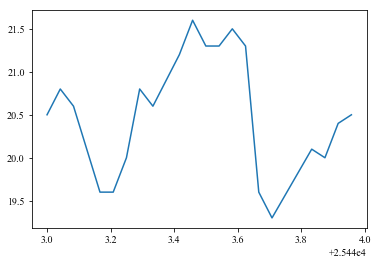

In [30]:
plt.plot(time, temperature)
plt.show()

## 3. Loop on the files
Hint: create a file list using [`glob`](https://docs.python.org/2/library/glob.html) module.     

In [23]:
datafilelist = sorted(glob.glob(datadir + "*.nc"))
datafilelist

['../data/Tarifa-coast-buoy/IR_TS_MO_Tarifa-coast-buoy_20190830.nc',
 '../data/Tarifa-coast-buoy/IR_TS_MO_Tarifa-coast-buoy_20190831.nc',
 '../data/Tarifa-coast-buoy/IR_TS_MO_Tarifa-coast-buoy_20190901.nc',
 '../data/Tarifa-coast-buoy/IR_TS_MO_Tarifa-coast-buoy_20190902.nc',
 '../data/Tarifa-coast-buoy/IR_TS_MO_Tarifa-coast-buoy_20190903.nc',
 '../data/Tarifa-coast-buoy/IR_TS_MO_Tarifa-coast-buoy_20190904.nc',
 '../data/Tarifa-coast-buoy/IR_TS_MO_Tarifa-coast-buoy_20190905.nc',
 '../data/Tarifa-coast-buoy/IR_TS_MO_Tarifa-coast-buoy_20190906.nc',
 '../data/Tarifa-coast-buoy/IR_TS_MO_Tarifa-coast-buoy_20190907.nc',
 '../data/Tarifa-coast-buoy/IR_TS_MO_Tarifa-coast-buoy_20190908.nc',
 '../data/Tarifa-coast-buoy/IR_TS_MO_Tarifa-coast-buoy_20190909.nc',
 '../data/Tarifa-coast-buoy/IR_TS_MO_Tarifa-coast-buoy_20191016.nc',
 '../data/Tarifa-coast-buoy/IR_TS_MO_Tarifa-coast-buoy_20191017.nc',
 '../data/Tarifa-coast-buoy/IR_TS_MO_Tarifa-coast-buoy_20191018.nc',
 '../data/Tarifa-coast-buoy/IR_TS_

In [33]:
timeall = np.array([])
tempall = np.array([])
for datafile in datafilelist:
    print("Working on {}".format(datafile))
    time, temperature = read_temp_nc(datafile)
    timeall = np.append(timeall, time)
    tempall = np.append(tempall, temperature)

Working on ../data/Tarifa-coast-buoy/IR_TS_MO_Tarifa-coast-buoy_20190830.nc
Working on ../data/Tarifa-coast-buoy/IR_TS_MO_Tarifa-coast-buoy_20190831.nc
Working on ../data/Tarifa-coast-buoy/IR_TS_MO_Tarifa-coast-buoy_20190901.nc
Working on ../data/Tarifa-coast-buoy/IR_TS_MO_Tarifa-coast-buoy_20190902.nc
Working on ../data/Tarifa-coast-buoy/IR_TS_MO_Tarifa-coast-buoy_20190903.nc
Working on ../data/Tarifa-coast-buoy/IR_TS_MO_Tarifa-coast-buoy_20190904.nc
Working on ../data/Tarifa-coast-buoy/IR_TS_MO_Tarifa-coast-buoy_20190905.nc
Working on ../data/Tarifa-coast-buoy/IR_TS_MO_Tarifa-coast-buoy_20190906.nc
Working on ../data/Tarifa-coast-buoy/IR_TS_MO_Tarifa-coast-buoy_20190907.nc
Working on ../data/Tarifa-coast-buoy/IR_TS_MO_Tarifa-coast-buoy_20190908.nc
Working on ../data/Tarifa-coast-buoy/IR_TS_MO_Tarifa-coast-buoy_20190909.nc
Working on ../data/Tarifa-coast-buoy/IR_TS_MO_Tarifa-coast-buoy_20191016.nc
Working on ../data/Tarifa-coast-buoy/IR_TS_MO_Tarifa-coast-buoy_20191017.nc
Working on .

### 4. Plot of the whole time series

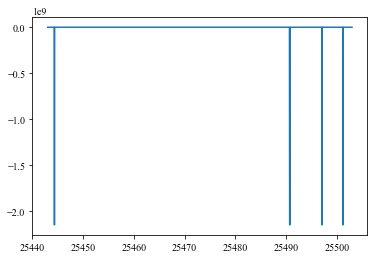

In [34]:
plt.plot(timeall, tempall)
plt.show()

In [38]:
tempall_masked = np.ma.masked_where(tempall < 0.0, tempall)

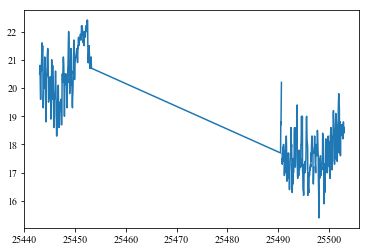

In [40]:
plt.plot(timeall, tempall_masked)
plt.show()